In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.datasets import make_blobs
np.random.seed(123)

% matplotlib inline

UsageError: Line magic function `%` not found.


Shape of dataset: (1000, 2)


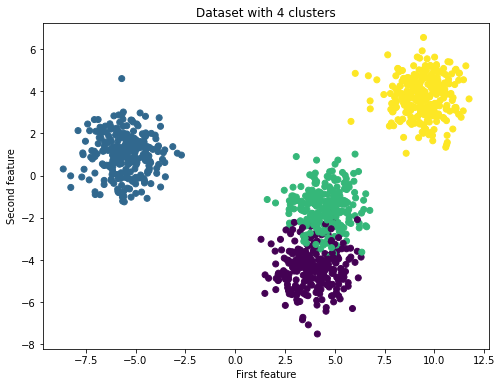

In [2]:
X, y = make_blobs(centers=4, n_samples=1000)
print(f'Shape of dataset: {X.shape}')

fig = plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=y)
plt.title("Dataset with 4 clusters")
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()

In [12]:
class KMeans():
    def __init__(self, n_clusters=4):
        self.k = n_clusters

    def fit(self, data):
        """
        Fits the k-means model to the given dataset
        """
        n_samples, _ = data.shape
        # initialize cluster centers
        self.centers = np.array(random.sample(list(data), self.k))
        self.initial_centers = np.copy(self.centers)

        # We will keep track of whether the assignment of data points
        # to the clusters has changed. If it stops changing, we are 
        # done fitting the model
        old_assigns = None
        n_iters = 0

        while True:
            new_assigns = [self.classify(datapoint) for datapoint in data]

            if new_assigns == old_assigns:
                print(f"Training finished after {n_iters} iterations!")
                return

            old_assigns = new_assigns
            n_iters += 1

            # recalculate centers
            for id_ in range(self.k):
                points_idx = np.where(np.array(new_assigns) == id_)
                datapoints = data[points_idx]
                self.centers[id_] = datapoints.mean(axis=0)

    def l2_distance(self, datapoint):
        dists = np.sqrt(np.sum((self.centers - datapoint)**2, axis=1))
        return dists

    def classify(self, datapoint):
        """
        Given a datapoint, compute the cluster closest to the
        datapoint. Return the cluster ID of that cluster.
        """
        dists = self.l2_distance(datapoint)
        return np.argmin(dists)

    def plot_clusters(self, data):
        plt.figure(figsize=(12,10))
        plt.title("Initial centers in black, final centers in red")
        plt.scatter(data[:, 0], data[:, 1], marker='.', c=y)
        plt.scatter(self.centers[:, 0], self.centers[:,1], c='g', marker='v')
        plt.scatter(self.initial_centers[:, 0], self.initial_centers[:,1], c='k',marker='o')
        plt.show()

In [13]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

Training finished after 4 iterations!


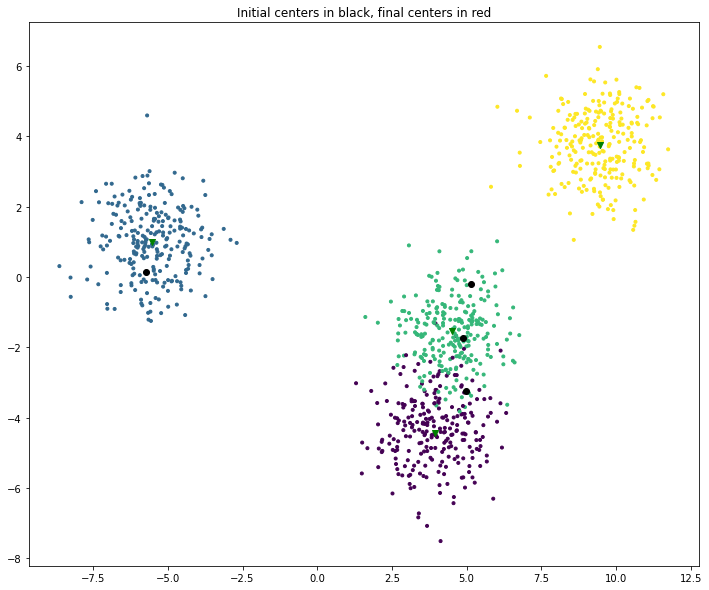

In [14]:
kmeans.plot_clusters(X)

# Hierarchical 

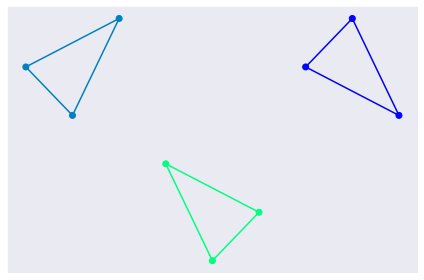

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from collections import defaultdict
from scipy.spatial import ConvexHull

# This data set represents a toy manufacturer's product data
#
# The first value in the pair represents a toy:
#    0-2: Action Figures
#    3-5: Building Blocks
#    6-8: Cars
#
# The second value is the age group that buys the most of that toy:
#    0: 5 year-olds
#    1: 6 year-olds
#    2: 7 year-olds
#    3: 8 year-olds
#    4: 9 year-olds
#    5: 10 year-olds
x = np.array([[0,4], [1,3], [2,5], [3,2], [4,0], [5,1], [6,4], [7,5], [8,3]])

# Set up hierarchical clustering and stop at 3 clusters
num_clusters = 3
hierarchical = AgglomerativeClustering(n_clusters=num_clusters).fit(x)

# Plot the data
sns.set_style("darkgrid")
colors = plt.get_cmap("winter")
points = plt.scatter(x[:, 0], x[:, 1], c=hierarchical.labels_,
            cmap=colors)

# Draw in the cluster regions
regions = defaultdict(list)
# Split points based on cluster
for index, label in enumerate(hierarchical.labels_):
    regions[label].append(list(x[index]))

# If a cluster has more than 2 points, find the convex hull for the region
# Otherwise just draw a connecting line
for key in regions:
    cluster = np.array(regions[key])
    if len(cluster) > 2:
        hull = ConvexHull(cluster)
        vertices = hull.vertices
        vertices = np.append(vertices, hull.vertices[0])
        plt.plot(cluster[vertices, 0], cluster[vertices, 1],
                 color=points.to_rgba(key))
    else:
        np.append(cluster, cluster[0])
        x_region, y_region = zip(*cluster)
        plt.plot(x_region, y_region, color=points.to_rgba(key))

# Remove ticks from the plot
plt.xticks([])
plt.yticks([])

plt.tight_layout()
plt.show()

# k- means with sklearn

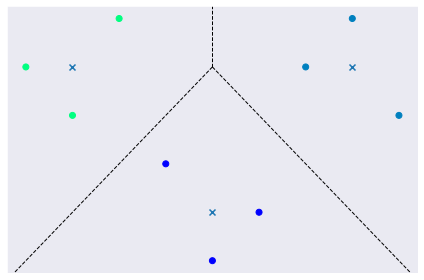

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial import Voronoi, voronoi_plot_2d

# This data set represents a toy manufacturer's product data
#
# The first value in the pair represents a toy:
#    0-2: Action Figures
#    3-5: Building Blocks
#    6-8: Cars
#
# The second value is the age group that buys the most of that toy:
#    0: 5 year-olds
#    1: 6 year-olds
#    2: 7 year-olds
#    3: 8 year-olds
#    4: 9 year-olds
#    5: 10 year-olds
x = np.array([[0,4], [1,3], [2,5], [3,2], [4,0], [5,1], [6,4], [7,5], [8,3]])

# Set up K-Means clustering with a fixed start and stop at 3 clusters
kmeans = KMeans(n_clusters=3, random_state=0).fit(x)

# Plot the data
sns.set_style("darkgrid")
plt.scatter(x[:, 0], x[:, 1], c=kmeans.labels_, cmap=plt.get_cmap("winter"))

# Save the axes limits of the current figure
x_axis = plt.gca().get_xlim()
y_axis = plt.gca().get_ylim()

# Draw cluster boundaries and centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], marker='x')
vor = Voronoi(centers)
voronoi_plot_2d(vor, ax=plt.gca(), show_points=False, show_vertices=False)

# Resize figure as needed
plt.gca().set_xlim(x_axis)
plt.gca().set_ylim(y_axis)

# Remove ticks from the plot
plt.xticks([])
plt.yticks([])

plt.tight_layout()
plt.show()